# Tính toán đa phương tiện - CS232.L21.KHCL- Bài tập PCA
Họ và tên: Nguyễn Khả Tiến

MSSV: 19522337

## Tải dữ liệu để test:

In [1]:
!gdown --id 12_QfTB8NlG3iUrHe799Z7aboQYlsJF-t

Downloading...
From: https://drive.google.com/uc?id=12_QfTB8NlG3iUrHe799Z7aboQYlsJF-t
To: /content/PCAtest.zip
100% 173k/173k [00:00<00:00, 11.7MB/s]


In [2]:
!unzip PCAtest.zip

Archive:  PCAtest.zip
   creating: PCAtest/
  inflating: PCAtest/CantinaBand3.wav  
  inflating: PCAtest/PCAtest.bmp     


In [3]:
cd PCAtest/

/content/PCAtest


## **Bài tập 1**: Xây dựng hàm PCA(X) và hàm khôi phục X*.

In [4]:
import numpy as np

In [5]:
#Chọn k(THÀNH PHẦN ĐƯỢC GIỮ LẠI) nhỏ nhất có thể dựa vào ma trận S.
def ChoosingK(S):
  k=S.shape[0]+1
  variance_is_remained=1
  #giữ lại tầm 96% lượng thông tin!
  while variance_is_remained>=0.96:
    k-=1
    variance_is_remained=S[:k].sum(axis=0)/S.sum(axis=0)
  return k+1

Hàm PCA:

In [6]:
def compressPCA(X):
  #chuyển về ma trận dạng cột
  X=X.T
  #lưu số lượng M samples:
  M=X.shape[1]
  X_mean=X.mean(axis=1,keepdims=True)
  X_=X-X_mean
  Sigma=np.dot(X_,X_.T)/M
  U,S,Vt=np.linalg.svd(Sigma,full_matrices=True)
  k=ChoosingK(S)
  U_reduce=U[:,:k]
  Z=np.dot(U_reduce.T,X_)
  return U_reduce,Z,X_mean,k

Hàm decode(U_k, Z_k) ==> X_star

In [7]:
def uncompressPCA(U_reduce,Z,X_mean):
  return (U_reduce.dot(Z)+X_mean).T

## **Bài Tập 2**: Sử dụng PCA để nén ảnh!

In [8]:
import cv2

In [9]:
img=cv2.imread('PCAtest.bmp',0)

Ảnh ban đầu:

In [10]:
from google.colab.patches import cv2_imshow

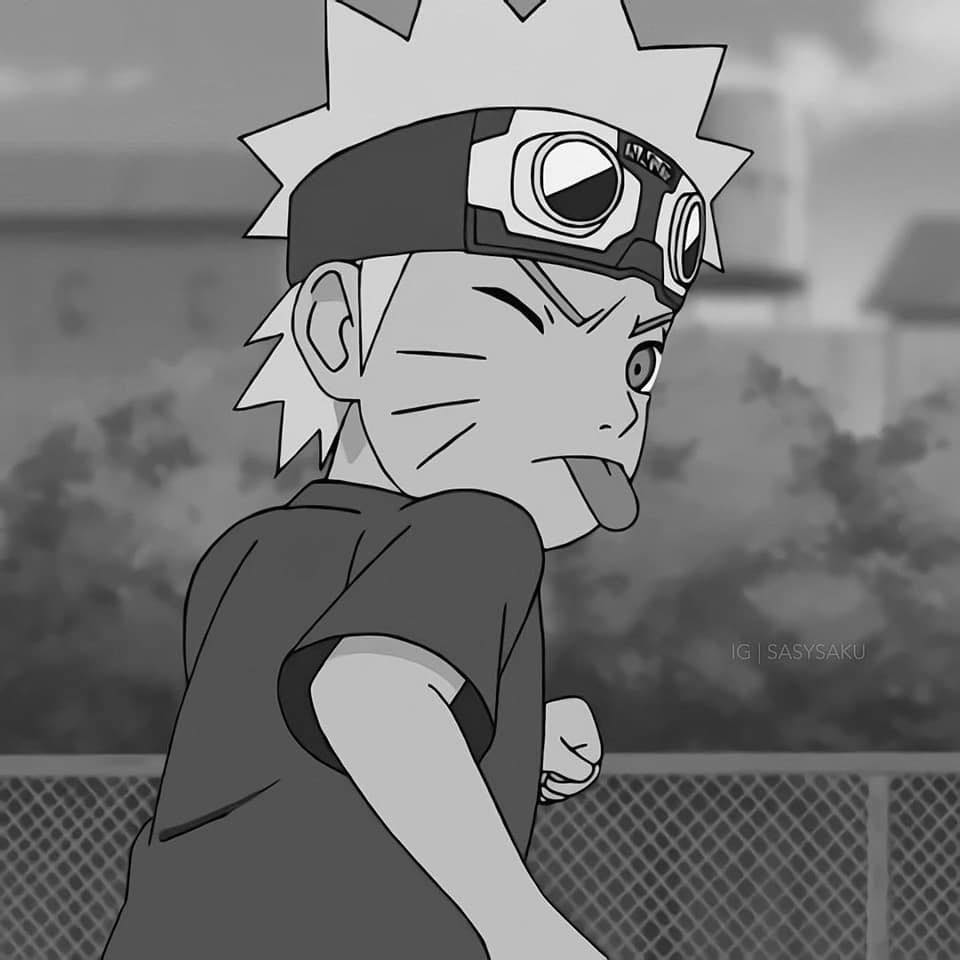

In [11]:
cv2_imshow(img)

In [12]:
U_reduce,Z,X_mean,k=compressPCA(img)

In [13]:
print('Số thành phần chính được giữ lại là: ',k)

Số thành phần chính được giữ lại là:  79


==> Số thành phần chính được giữ lại là **79**

In [14]:
U_approx=uncompressPCA(U_reduce,Z,X_mean)

Ảnh sau khi sử dụng PCA để nén và hồi phục:

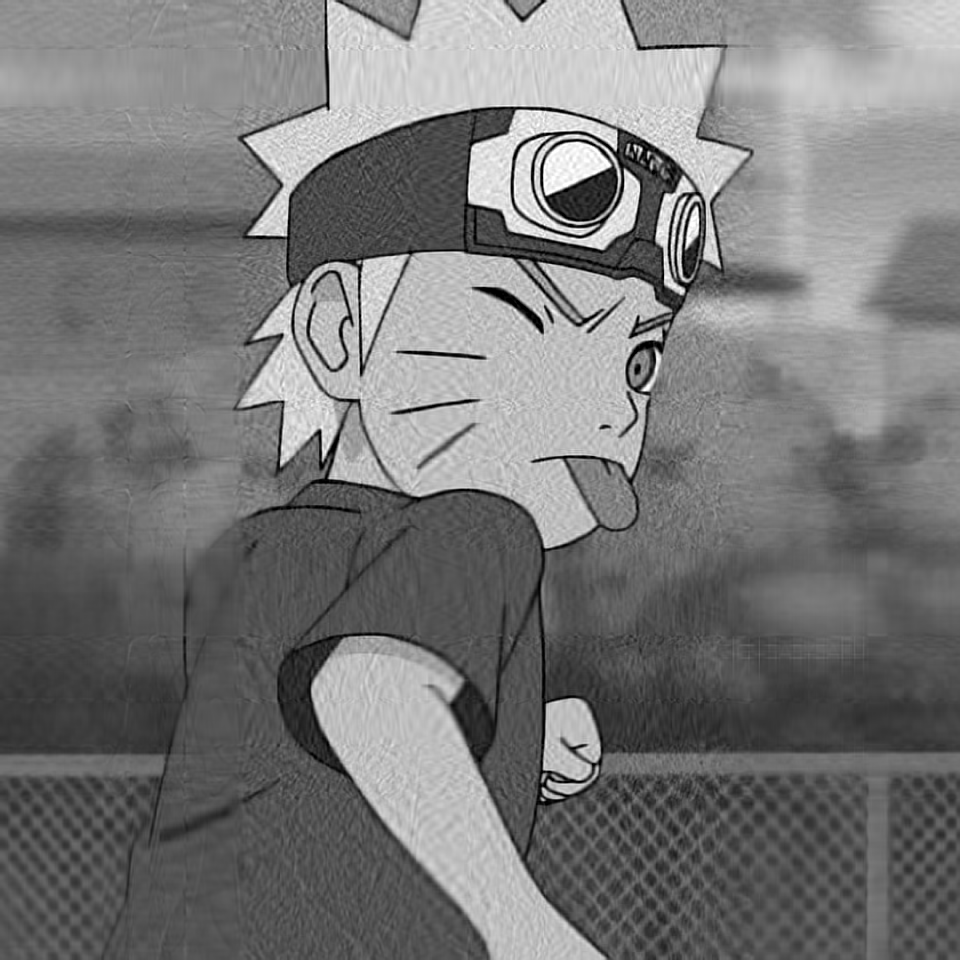

In [15]:
cv2_imshow(U_approx)

## **Bài tập 3**: Sử dụng 2 hàm ở BT1 với file âm thanh WAV

Đọc file âm thanh.

In [16]:
from scipy.io.wavfile import read
a = read("CantinaBand3.wav")
audio=list(a[1])

a[0]: sampling rate

a[1]: mảng biên độ theo thời gian

In [17]:
a

(22050, array([   3,    7,    0, ...,  -12, -427, -227], dtype=int16))

In [18]:
a[1]

array([   3,    7,    0, ...,  -12, -427, -227], dtype=int16)

Độ dài mảng ban đầu:

In [19]:
original_len=a[1].shape[0]

In [20]:
original_len

66150

Hàm để adding trước khi cắt mảng 1 chiều này thành ma trận (1024,x).

In [21]:
def addinglength(original_len):
  heso=0
  if original_len%1024==0:
    heso= original_len/1024
  else:
    heso= int(original_len/1024)+1
  adding_num=heso*1024-original_len
  return adding_num

Tiến hành adding:

In [22]:
audio+=([0 for i in range(addinglength(original_len))])

Độ dài sau khi adding:

In [23]:
len(audio)

66560

In [24]:
audio_np=np.array(audio,dtype=np.int16)
audio_np

array([3, 7, 0, ..., 0, 0, 0], dtype=int16)

In [25]:
audio_np.shape

(66560,)

Chuyển thành ma trận (1024,x) trước khi đưa vào hàm PCA:

In [26]:
audio_np_matrix=audio_np.reshape(1024,-1)

In [27]:
U_reduce,Z,X_mean,k=compressPCA(audio_np_matrix)

In [29]:
print('Số thành phần chính được giữ lại là: ',k)

Số thành phần chính được giữ lại là:  16


==> Số thành phần chính được giữ lại là **16**

In [30]:
U_approx=uncompressPCA(U_reduce,Z,X_mean)

Reshape lại array như ban đầu.

In [31]:
audio_approx=U_approx.reshape(len(audio))
audio_approx

array([  2.24172913,  13.34405327, -11.40624935, ...,   0.93760112,
         2.92926202,  -4.03277213])

Trả về kích thước cũ:

In [32]:
audio_approx_new=audio_approx[:original_len]
audio_approx_new.shape

(66150,)

Test file âm thanh sau khi dùng PCA:

In [35]:
from IPython.display import Audio

a[0]: sampling rate

a[1]: mảng numpy các giá trị biên độ âm thanh gốc.

audio_approx_new: mảng sau khi được decode từ PCA.

Âm thanh sau khi được decode từ PCA.

In [36]:
Audio(data=audio_approx_new, rate=a[0])

Âm thanh ban đầu:

In [37]:
Audio(data=a[1], rate=a[0])